## Artificial  Feed Forward neural networks: case Zalando
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
  
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.  
  
To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.  
  
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.
  
#### Labels
  
Each training and test example is assigned to one of the following labels:  

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot
  
#### Questions  
  
- Visualize the first 25 images in a 5x5 matrix. Tip: you can convert a pandas dataframe in a numpy (2-dimensional) array with df.to_numpy()
- Create a feed forward neural network model to predict the label from the image with following hyperparameters
    - Three hidden layers with each 256 neurons
    - Sigmoid as activation function for the hidden layers and softmax as activation function for the output layer
    - Dropout of 20%
    - Adam with a learning rate of 0.001 as a optimizer
    - use all training data for each learning step
- Determine the accuracy of the model
- Visualize some correctly and some incorrectly classified article images. 


In [144]:
import numpy as np
import pandas as pd

# For reasons of size the training set is split into two files. 
# Combine the files to obtain a single dataframe. 
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/'
train1 = pd.read_csv(url+'fashion-mnist_train1.csv',sep=',')
train2 = pd.read_csv(url+'fashion-mnist_train2.csv',sep=',')
train = pd.concat([train1,train2]).reset_index(drop=True)
test   = pd.read_csv(url+'fashion-mnist_test.csv',sep=',')

In [145]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [146]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [147]:
X_train_all = train.drop('label',axis=1)
y_train_all = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']
print(X_train_all.head(10))
print(y_test.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       5       4       5       5       3       5   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       3       2       0   
9       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0        

In [148]:
y_train_all[0]

2

In [149]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = x_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)

In [150]:
# convert pandas dataframe X_train_all to numpy array x_train
x_train_all = X_train_all.to_numpy()
x_train = X_train.to_numpy()
x_val = X_val.to_numpy()
x_test = X_test.to_numpy()
print(x_train_all)
print("----------")
# reshape first image
# print(x_train_all[0].reshape(28,28))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------


<Figure size 432x288 with 0 Axes>

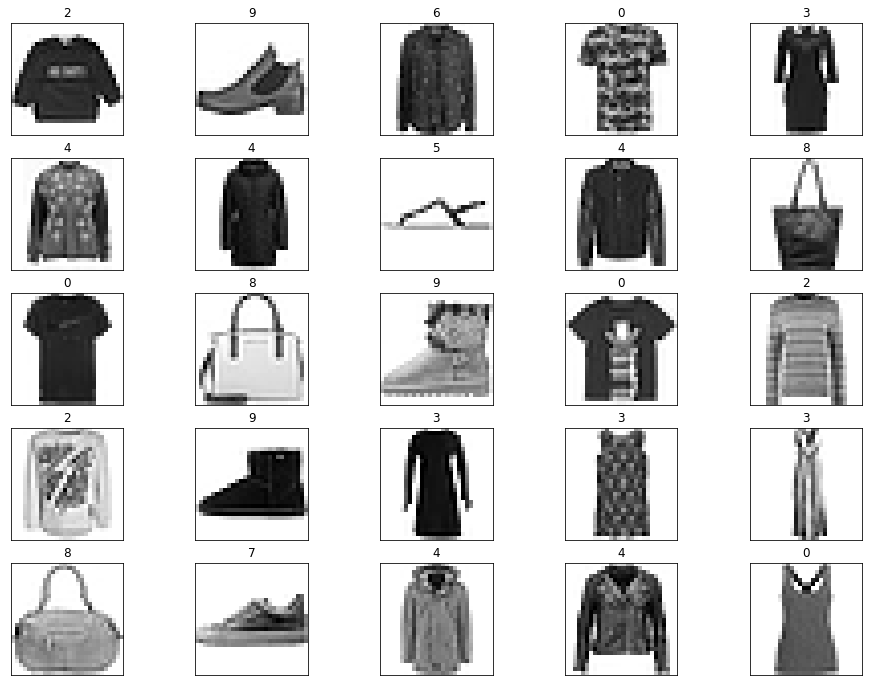

In [151]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols = 5,5
plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

for i in range(25):  # show first 12 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in 3 x 4 table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(x_train_all[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(y_train_all[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

In [152]:
# let's print the shape 
print("x_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("x_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("x_val shape", X_val.shape)
print("y_val shape", y_val.shape)
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
x_train_all = x_train_all.astype('float32')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train_all /= 255
x_val /= 255
x_test /= 255

# print the final input shape 
print("Train_all matrix shape", x_train_all.shape)
print("Train matrix shape", x_train.shape)
print("Val matrix shape", x_val.shape)
print("Test matrix shape", x_test.shape)

x_train_all shape (60000, 784)
y_train_all shape (60000,)
x_train shape (50000, 784)
y_train shape (50000,)
x_val shape (10000, 784)
y_val shape (10000,)
x_test shape (10000, 784)
y_test shape (10000,)
Train_all matrix shape (60000, 784)
Train matrix shape (50000, 784)
Val matrix shape (10000, 784)
Test matrix shape (10000, 784)


In [153]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [154]:
# one-hot encoding using keras' numpy-related utilities
y_train = to_categorical(y_train)
print(y_train.shape)
y_train_all = to_categorical(y_train_all)
print(y_train[0])  # one sample’s categorical data
y_val = to_categorical(y_val)
print(y_val.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

(50000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10000, 10)
(10000, 10)


In [155]:
num_classes = 10

# this first network has 2 hidden layers
# the first layer needs to be told explicitly what the input shape is
# the output layer has 10 neurons: one neuron per class (digit)

# Note that we use the "He" initialisation scheme here, since this is often advised 
# for layers with ReLu neurons

# Also note that "dropout" is implemented in separate layers in Keras
# they are added below in comment 
# note that you can also start your network with a dropout layer (randomly setting input features to 0)

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()


    # The first Dense object is the first hidden layer. Dense is one particular type of layer, but there are many other types
    # Dense is the most basic kind of layer in an ANN and each output of a dense layer is computed using every input to the layer
    # The input shape parameter input_shape=(784,) tells us how many neurons our input layer has, so in our case, we have 784.
    # The neural network needs to start with some weights and then iteratively updates them to better values. 
    # The term kernel_initializer is a fancy term for the statistical distribution or function 
    # to use for initialising the weights. 
    # The input layer shape is specified as a parameter to the first Dense object’s constructor.
    model.add(Dense(256, activation='sigmoid', input_shape=(784,), kernel_initializer='he_uniform'))
    # then add some dropout, set at a very low value for now
    model.add(Dropout(0.2))
    # a second dense layer with half as many neurons
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    
    # some more dropout
    model.add(Dropout(0.2))      
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    
    # some more dropout
    model.add(Dropout(0.2))      # and the output layer
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model



In [156]:
# Create your model
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
# batch_size = 16
epochs = 20

# We fit our model to the data. Fitting the model to the data means to train the model on the data.
# X_train is a numpy array consisting of the training samples.
# y_train is a numpy array consisting of the corresponding labels for the training samples.
# batch_size specifies how many training samples should be sent to the model at once.
# epochs = how many times the complete training set (all of the samples) will be passed to the model.
# verbose = 1 indicates how much logging we will see as the model trains. (other values are a.o. 0, 2)
history_1 = model_1.fit(x_train, y_train,
                    #batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val)
                    )

# The output gives us the following values for each epoch:
# Epoch number
# Duration in seconds
# Loss
# Accuracy


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)               

Training set Accuracy:   0.78
Training set Loss: 0.5553

Validation set Accuracy:   0.79
Validation set Loss: 0.5490



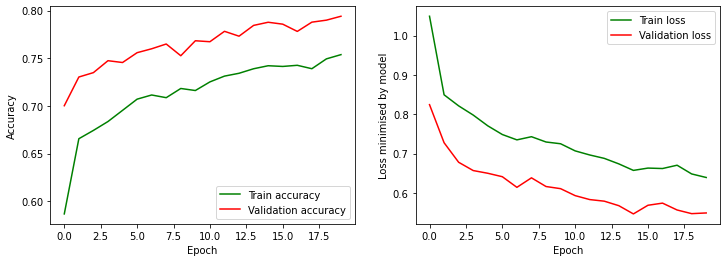

In [157]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(x_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(x_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

In [161]:
# final model
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
# batch_size = 128
epochs = 20

history_for_test = model_for_test.fit(x_train_all, y_train_all,
                    # batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

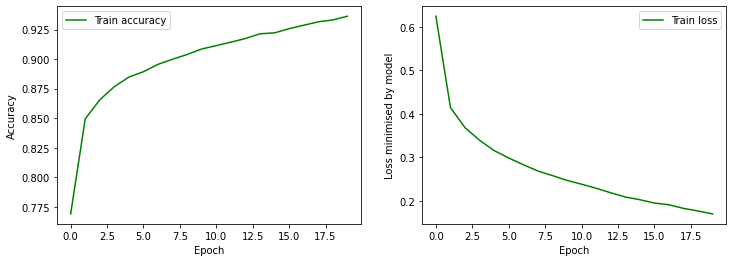

In [162]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
        # g-: green solid line
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [163]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))


Training set Accuracy:   0.94
Training set Loss: 0.1722

Test set Accuracy:   0.87
Test set Loss: 0.4353



In [164]:
predictions = model_for_test.predict(X_test)
# The first cloud should be a 0 (shown as 1. at index 0)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0: 95.2894032001%
1: 0.0000525543%
2: 0.3299594158%
3: 0.0001906099%
4: 0.0053526728%
5: 0.0000317223%
6: 4.3714884669%
7: 0.0000003624%
8: 0.0034947261%
9: 0.0000187830%


In [165]:
# Locating the Incorrect Predictions
images = x_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

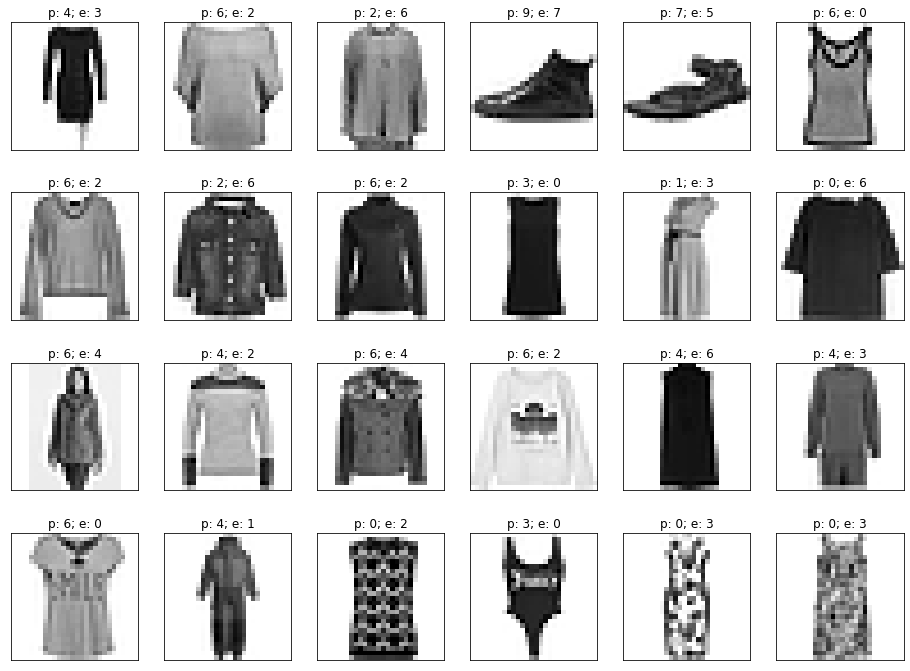

In [166]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis